In [23]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [24]:
X, y = make_circles(n_samples=100,noise=0.1,random_state=1)

<Axes: >

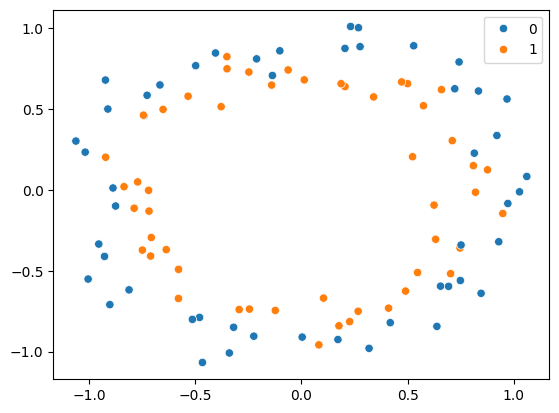

In [25]:
sns.scatterplot(x = X[:,0],y = X[:,1],hue=y)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [27]:
model = Sequential()
model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

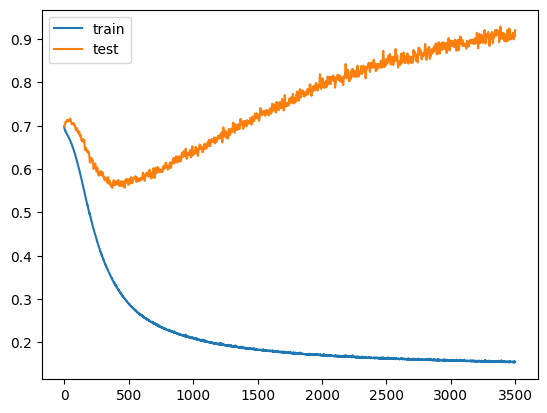

In [30]:
plt.plot(history.history['loss'],label = 'train')
plt.plot(history.history['val_loss'],label = 'test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


<Axes: >

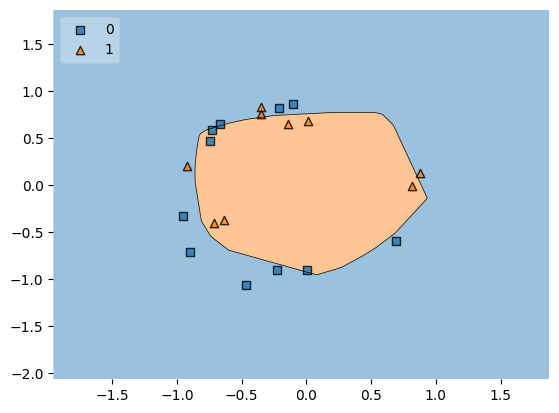

In [34]:
plot_decision_regions(X_test,y_test.ravel(),clf=model,legend=2)

# Early Stopping

In [44]:
model = Sequential()
model.add(Dense(256,input_dim = 2,activation='relu'))
model.add(Dense(1,activation = 'sigmoid'))

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [50]:
callback = EarlyStopping(
    monitor = "val_loss",
    min_delta=0.00001,
    patience = 20,
    verbose=1,
    mode="auto",
    baseline = None,
    restore_best_weights=True
)

In [51]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1200, callbacks=callback)

Epoch 1/1200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6227 - loss: 0.6735 - val_accuracy: 0.4000 - val_loss: 0.7129
Epoch 2/1200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5836 - loss: 0.6825 - val_accuracy: 0.4000 - val_loss: 0.7126
Epoch 3/1200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6422 - loss: 0.6700 - val_accuracy: 0.4000 - val_loss: 0.7126
Epoch 4/1200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6055 - loss: 0.6773 - val_accuracy: 0.4000 - val_loss: 0.7120
Epoch 5/1200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6484 - loss: 0.6683 - val_accuracy: 0.4000 - val_loss: 0.7114
Epoch 6/1200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6430 - loss: 0.6714 - val_accuracy: 0.4000 - val_loss: 0.7106
Epoch 7/1200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6250 - loss: 0.6754 - val_accuracy: 0.4000 - val_loss: 0.7103
Epoch 8/1200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5977 - loss: 0.6725 - val_accuracy: 0.4000 - v

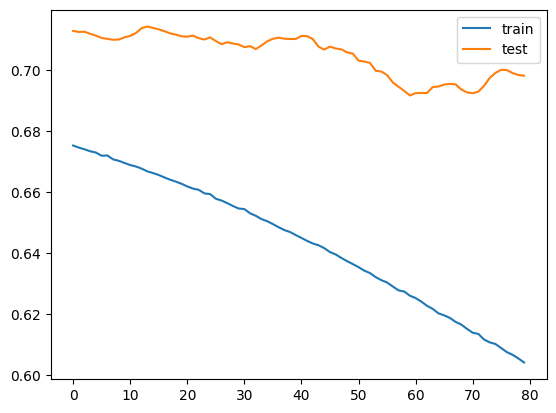

In [52]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


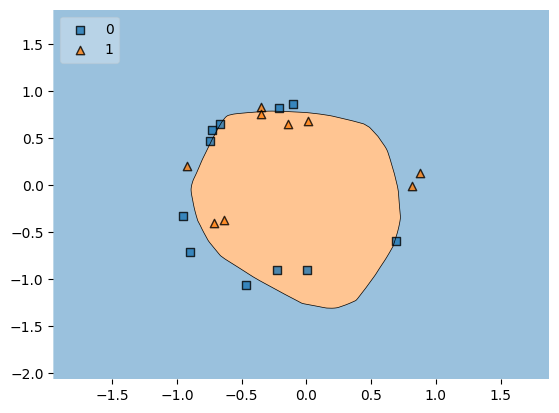

In [53]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Text(45.722222222222214, 0.5, 'True Label')

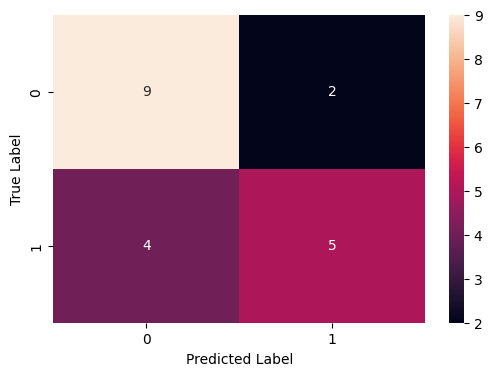

In [59]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32") 
cm = confusion_matrix(y_test,y_pred_classes)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

